# 2nd Assignment Programming for Big Data

### Abstract

This Jupyter Notebook is a showcase of various machine learning modelling methods, as well as data treatment methods and model evaluation.

### Dataset

The data have been downloaded from https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients.
The data show information about default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

The aim is to predict which customer more likely will default. 

There is one binary variable, default payment (Yes = 1, No = 0), as the response variable. 

There are 23 variables as explanatory variables:

- LIMIT_BAL (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

- Sex (1 = male; 2 = female).

- Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).

- Marital status (1 = married; 2 = single; 3 = others).

- Age (year).



PAY_0 - PAY_6: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: 


- PAY_0 = the repayment status in September, 2005; 
- PAY1 = the repayment status in August, 2005; . . .;
- PAY_6 = the repayment status in April, 2005. 

The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

BILL_AMT1 - BILL_AMT6: Amount of bill statement (NT dollar). 
 
- BILL_AMT1 = amount of bill statement in September, 2005; 
- BILL_AMT2 = amount of bill statement in August, 2005; . . .; 
- BILL_AMT6 = amount of bill statement in April, 2005.

PAY_AMT1 - PAY_AMT6: Amount of previous payment (NT dollar). 
 
 
- PAY_AMT1 = amount paid in September, 2005; 
- PAY_AMT2 = amount paid in August, 2005;...;
- PAY_AMT6= amount paid in April, 2005.




### Setup

In [31]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
file_path=r'C:\Users\Marco\Desktop\TU Dublin\Programming for Big Data - H6018\2nd Assignment\data'
file_name='/credit_card_default.xls'

In [59]:
df = pd.read_excel(file_path+file_name, encoding = "ISO-8859-1")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# 1. Data Exploration and Preparation

In [4]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


It's important that each entry is unique, so we check for duplicated customer numbers. There are none. 

As ID is not useful for us, we can drop it. 

In [60]:
df.ID.duplicated().sum()

0

In [61]:
df.drop(['ID'], axis=1, inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


Our target variable is the 'default payment next month', we rename it as 'def_next_month' and check how many defaults we have in the dataset.

We rename PAY_0 to PAY_1, to use the same name convention as for the other variables.

In [64]:
df = df.rename(columns = {'default payment next month' : 'def_next_month', 
                          'PAY_0' : 'PAY_1'})
df.def_next_month.value_counts()

0    22996
1     6605
Name: def_next_month, dtype: int64

### Data Incosistencies

In [8]:
df.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [9]:
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

According to the documentation, we do not know what MARRIAGE = 0 and EDUCATION = 5, 6, 0 means. We could group them in the group 'another', but as it would be only our assumption, I prefer to delete those records.

399 records have been deleted

In [65]:
# MARRIAGE = 0 is deleted
df = df.drop(df[df['MARRIAGE']==0].index)

# EDUCATION = 0, 5 and 6 are deleted
df = df.drop(df[df['EDUCATION']==0].index)
df = df.drop(df[df['EDUCATION']==5].index)
df = df.drop(df[df['EDUCATION']==6].index)
print(len(df))

29601


In [11]:
df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000
mean,-0.014932,-0.131313,-0.163440,-0.218303,-0.263978,-0.287558
std,1.124503,1.199642,1.199793,1.172220,1.136217,1.152206
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


According to the documentation, the repayment variables were supposed to be between -1 and 9, the min and max show they are between -2 and 8

In [12]:
# creating series of PAY variables, to check the values count in order to try to find a possible alternative
PAY1=pd.Series(df.PAY_1.value_counts())
PAY2=pd.Series(df.PAY_2.value_counts())
PAY3=pd.Series(df.PAY_3.value_counts())
PAY4=pd.Series(df.PAY_4.value_counts())
PAY5=pd.Series(df.PAY_5.value_counts())
PAY6=pd.Series(df.PAY_6.value_counts())
final=PAY1+PAY2+PAY3+PAY4+PAY5+PAY6

print(final)

-2    24029.0
-1    34257.0
 0    94434.0
 1        NaN
 2    18861.0
 3     1423.0
 4      451.0
 5      135.0
 6       74.0
 7      218.0
 8       28.0
dtype: float64


The value 1 is NaN because it is cointained only in the PAY_1 variable.
We assume that values -2 and -1 are the duly repayment, which are indicated with -1 in the documentation.

The other values, we assume they should be shifted by one, as 0 does not exist in the documentation and they should be between 1 and 9.

In [66]:
for att in ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
  # categories -2,-1 are grouped into a single class -1: pay duty   
  filter = (df[att] == -2) | (df[att] == -1) 
  df.loc[filter, att] = -1
  df[att] = df[att].astype('int64')
  filter = (df[att] >= 0)
  df.loc[filter, att] = df.loc[filter, att] + 1

In [14]:
df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000,29601.000000
mean,0.794770,0.666329,0.638492,0.591939,0.550894,0.520759
std,1.339224,1.397190,1.389153,1.350751,1.309342,1.325013
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


### Data Visualization

We split the data into two sets. df_0 is the data for customers who did not default. df_1 is the set for customers who had a default

In [15]:
df_0 =df[df.def_next_month==0]
df_1 = df[df.def_next_month==1]
print('The percentage of defaults is:',len(df_1)/len(df))

The percentage of defaults is: 0.2231343535691362


We want to visually compare some variables between the No Default and Default customers. 

We see that the distributions of ages are very similar between the groups.

The gap between gender is higher when looking at the No Default group, in both groups we have more women than men.

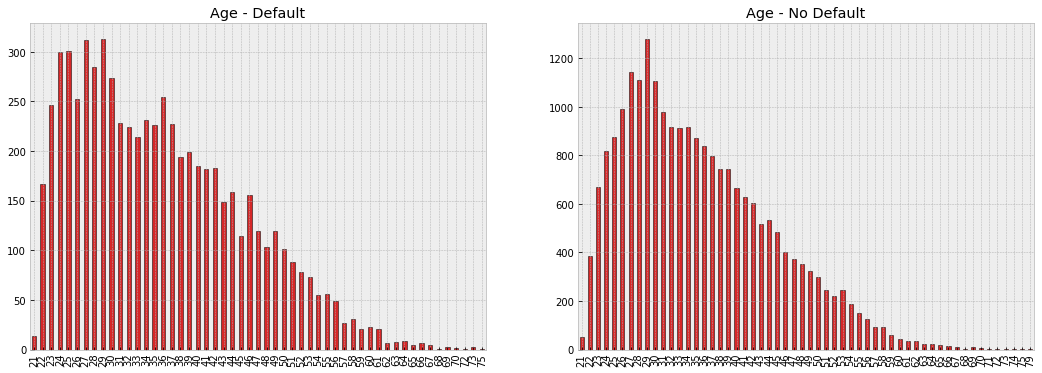

In [16]:
plt.style.use('bmh')

plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
df_1.AGE.value_counts().sort_index().plot(kind='bar',title='Age - Default',color='tab:red',edgecolor='k')

plt.subplot(1,2,2)
df_0.AGE.value_counts().sort_index().plot(kind='bar',title='Age - No Default',color='tab:red',edgecolor='k')

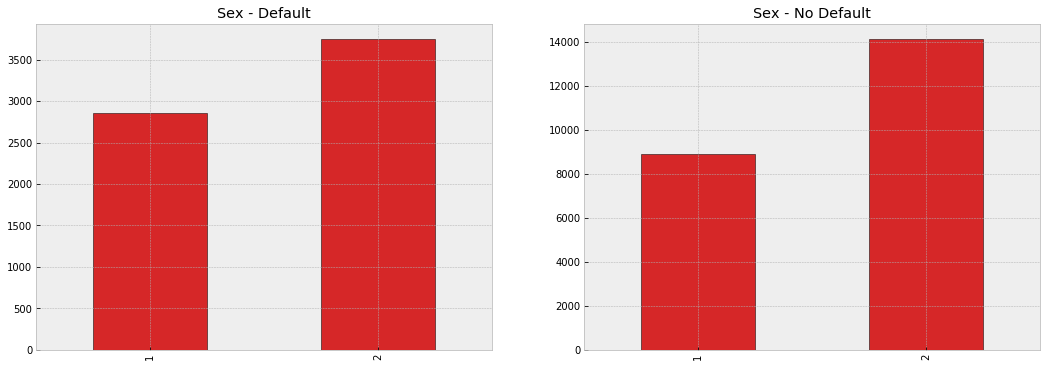

In [17]:
plt.figure(figsize=(18,6))

plt.subplot(1,2,1)
df_1.SEX.value_counts().sort_index().plot(kind='bar',title='Sex - Default',color='tab:red',edgecolor='k')

plt.subplot(1,2,2)
df_0.SEX.value_counts().sort_index().plot(kind='bar',title='Sex - No Default',color='tab:red',edgecolor='k')

Looking at the repayment status, for the two groups, we can observe that the No Default has always the 'one month delay' (1) as the most common value, and the 'paid duly' (-1) as second most common value.

This is not always true for the Default group. One month, two months and three months ago (PAY_1, PAY_2 and PAY_3) there are more customers with three months delay, than the ones who paid duly

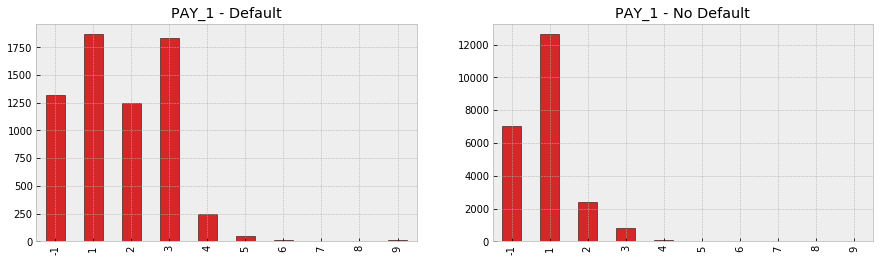

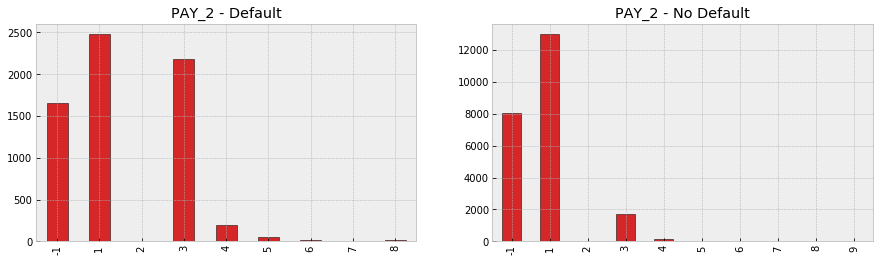

<Figure size 1080x288 with 0 Axes>

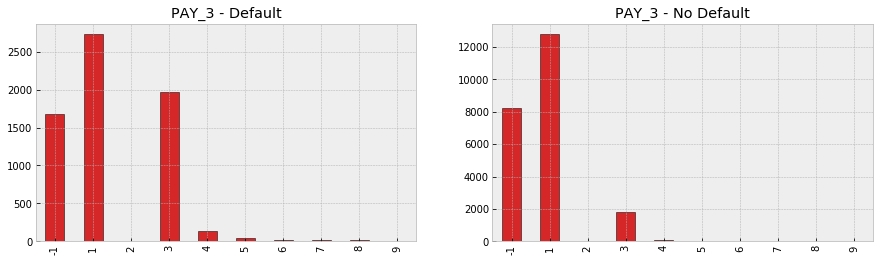

<Figure size 1080x288 with 0 Axes>

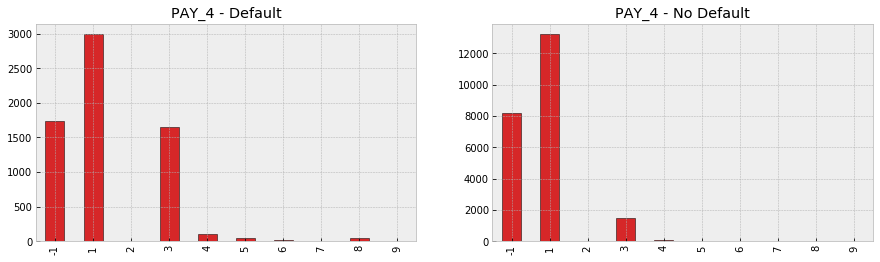

<Figure size 1080x288 with 0 Axes>

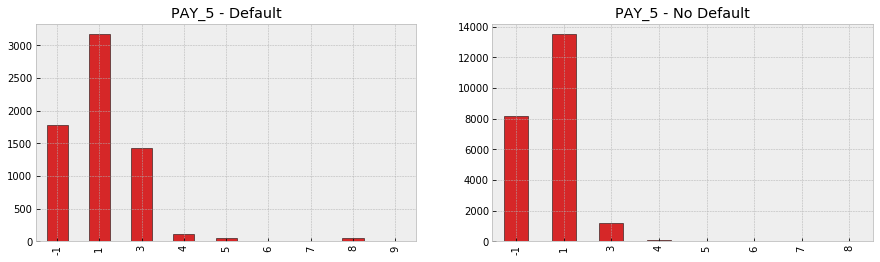

<Figure size 1080x288 with 0 Axes>

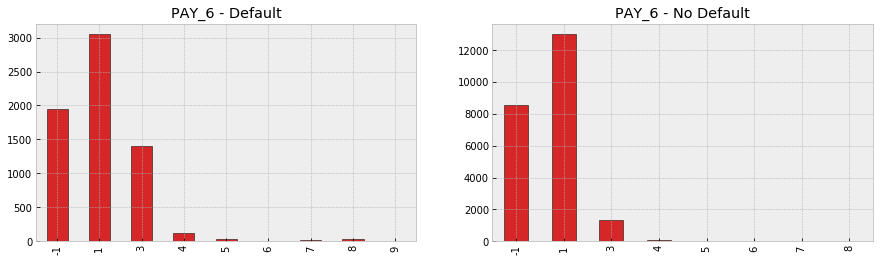

In [123]:
# Looking at repayment status one month before
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
df_1.PAY_1.value_counts().sort_index().plot(kind='bar',title='PAY_1 - Default',color='tab:red',edgecolor='k')
plt.subplot(1,2,2)
df_0.PAY_1.value_counts().sort_index().plot(kind='bar',title='PAY_1 - No Default',color='tab:red',edgecolor='k')

# Looking at repayment status two months before
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
df_1.PAY_2.value_counts().sort_index().plot(kind='bar',title='PAY_2 - Default',color='tab:red',edgecolor='k')
plt.subplot(1,2,2)
df_0.PAY_2.value_counts().sort_index().plot(kind='bar',title='PAY_2 - No Default',color='tab:red',edgecolor='k')

# Looking at repayment status three months before
plt.figure(figsize=(15,4))
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
df_1.PAY_3.value_counts().sort_index().plot(kind='bar',title='PAY_3 - Default',color='tab:red',edgecolor='k')
plt.subplot(1,2,2)
df_0.PAY_3.value_counts().sort_index().plot(kind='bar',title='PAY_3 - No Default',color='tab:red',edgecolor='k')

# Looking at repayment status four months before
plt.figure(figsize=(15,4))
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
df_1.PAY_4.value_counts().sort_index().plot(kind='bar',title='PAY_4 - Default',color='tab:red',edgecolor='k')
plt.subplot(1,2,2)
df_0.PAY_4.value_counts().sort_index().plot(kind='bar',title='PAY_4 - No Default',color='tab:red',edgecolor='k')

# Looking at repayment status five before
plt.figure(figsize=(15,4))
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
df_1.PAY_5.value_counts().sort_index().plot(kind='bar',title='PAY_5 - Default',color='tab:red',edgecolor='k')
plt.subplot(1,2,2)
df_0.PAY_5.value_counts().sort_index().plot(kind='bar',title='PAY_5 - No Default',color='tab:red',edgecolor='k')

# Looking at repayment status six before
plt.figure(figsize=(15,4))
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
df_1.PAY_6.value_counts().sort_index().plot(kind='bar',title='PAY_6 - Default',color='tab:red',edgecolor='k')
plt.subplot(1,2,2)
df_0.PAY_6.value_counts().sort_index().plot(kind='bar',title='PAY_6 - No Default',color='tab:red',edgecolor='k')

Finally, looking at the education we can not spot significant differences between the two groups. However, for the marriage status we can observe that in the Default group the customers married and not married are almost equal

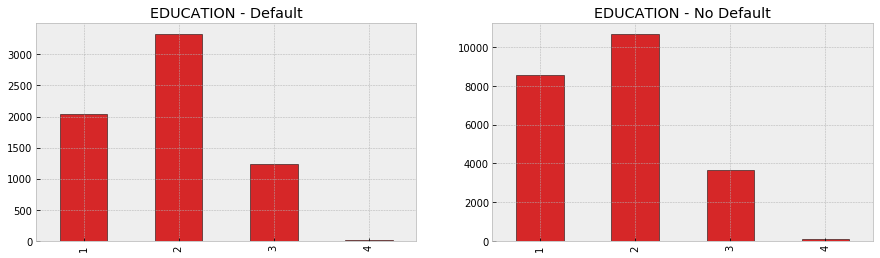

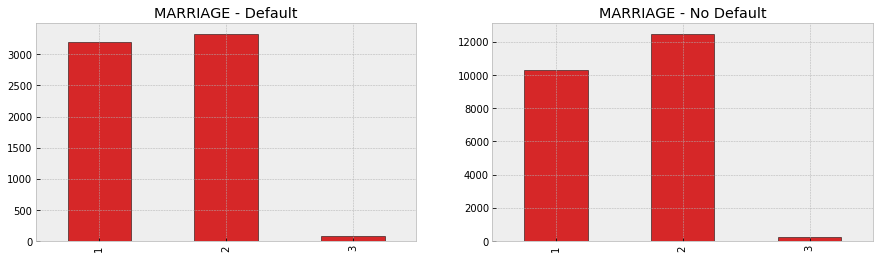

In [126]:
# Looking at education and marriage status one month before
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
df_1.EDUCATION.value_counts().sort_index().plot(kind='bar',title='EDUCATION - Default',color='tab:red',edgecolor='k')
plt.subplot(1,2,2)
df_0.EDUCATION.value_counts().sort_index().plot(kind='bar',title='EDUCATION - No Default',color='tab:red',edgecolor='k')

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
df_1.MARRIAGE.value_counts().sort_index().plot(kind='bar',title='MARRIAGE - Default',color='tab:red',edgecolor='k')
plt.subplot(1,2,2)
df_0.MARRIAGE.value_counts().sort_index().plot(kind='bar',title='MARRIAGE - No Default',color='tab:red',edgecolor='k')

### Summary Statistics

Now we want to look at some summary statistics of the LIMIT_BAL, BILL_AMT1-BILL_AMT6 and PAY_AMT1-PAY_AMT6. We make new datasets for each, and compile them into a table.

In [35]:
limit_bal0   =  pd.Series(df_0.LIMIT_BAL.describe(),name='limit_bal_0')
limit_bal1   =  pd.Series(df_1.LIMIT_BAL.describe(),name='limit_bal_1')

bill_amt_1_0   =  pd.Series(df_0.BILL_AMT1.describe(),name='BILL_AMT1_0')
bill_amt_1_1   =  pd.Series(df_1.BILL_AMT1.describe(),name='BILL_AMT1_1')
bill_amt_2_0   =  pd.Series(df_0.BILL_AMT2.describe(),name='BILL_AMT2_0')
bill_amt_2_1   =  pd.Series(df_1.BILL_AMT2.describe(),name='BILL_AMT2_1')
bill_amt_3_0   =  pd.Series(df_0.BILL_AMT3.describe(),name='BILL_AMT3_0')
bill_amt_3_1   =  pd.Series(df_1.BILL_AMT3.describe(),name='BILL_AMT3_1')
bill_amt_4_0   =  pd.Series(df_0.BILL_AMT4.describe(),name='BILL_AMT4_0')
bill_amt_4_1   =  pd.Series(df_1.BILL_AMT4.describe(),name='BILL_AMT4_1')
bill_amt_5_0   =  pd.Series(df_0.BILL_AMT5.describe(),name='BILL_AMT5_0')
bill_amt_5_1   =  pd.Series(df_1.BILL_AMT5.describe(),name='BILL_AMT5_1')
bill_amt_6_0   =  pd.Series(df_0.BILL_AMT6.describe(),name='BILL_AMT6_0')
bill_amt_6_1   =  pd.Series(df_1.BILL_AMT6.describe(),name='BILL_AMT6_1')

pay_amt_1_0   =  pd.Series(df_0.PAY_AMT1.describe(),name='PAY_AMT1_0')
pay_amt_1_1   =  pd.Series(df_1.PAY_AMT1.describe(),name='PAY_AMT1_1')
pay_amt_2_0   =  pd.Series(df_0.PAY_AMT2.describe(),name='PAY_AMT2_0')
pay_amt_2_1   =  pd.Series(df_1.PAY_AMT2.describe(),name='PAY_AMT2_1')
pay_amt_3_0   =  pd.Series(df_0.PAY_AMT3.describe(),name='PAY_AMT3_0')
pay_amt_3_1   =  pd.Series(df_1.PAY_AMT3.describe(),name='PAY_AMT3_1')
pay_amt_4_0   =  pd.Series(df_0.PAY_AMT4.describe(),name='PAY_AMT4_0')
pay_amt_4_1   =  pd.Series(df_1.PAY_AMT4.describe(),name='PAY_AMT4_1')
pay_amt_5_0   =  pd.Series(df_0.PAY_AMT5.describe(),name='PAY_AMT5_0')
pay_amt_5_1   =  pd.Series(df_1.PAY_AMT5.describe(),name='PAY_AMT5_1')
pay_amt_6_0   =  pd.Series(df_0.PAY_AMT6.describe(),name='PAY_AMT6_0')
pay_amt_6_1   =  pd.Series(df_1.PAY_AMT6.describe(),name='PAY_AMT6_1')


For limit_bal the two groups behave quite similarly, there are no huge differences in the mean, std, min and max

It is similar for bill_amt, mean and std are similar. In this case the min and max changes a lot, they are much bigger and smaller in the No Default group

In [135]:
summary_stats_limit = pd.concat([limit_bal0, limit_bal1],axis=1)
pd.options.display.float_format = '{:.2f}'.format
summary_stats_limit

,limit_bal_0,limit_bal_1
count,22996.00,6605.00
mean,178299.97,130125.31
std,131876.84,115424.11
min,10000.00,10000.00
25%,70000.00,50000.00
50%,150000.00,90000.00
75%,250000.00,200000.00
max,1000000.00,740000.00


In [36]:
summary_stats_bill = pd.concat([bill_amt_1_0,bill_amt_1_1,bill_amt_2_0,bill_amt_2_1,bill_amt_3_0,bill_amt_3_1,bill_amt_4_0,
                                bill_amt_4_1,bill_amt_5_0,bill_amt_5_1,bill_amt_6_0,bill_amt_6_1],axis=1)
pd.options.display.float_format = '{:.2f}'.format
summary_stats_bill

,BILL_AMT1_0,BILL_AMT1_1,BILL_AMT2_0,BILL_AMT2_1,BILL_AMT3_0,BILL_AMT3_1,BILL_AMT4_0,BILL_AMT4_1,BILL_AMT5_0,BILL_AMT5_1,BILL_AMT6_0,BILL_AMT6_1
count,22996.00,6605.00,22996.00,6605.00,22996.00,6605.00,22996.00,6605.00,22996.00,6605.00,22996.00,6605.00
mean,51716.44,48314.87,49463.30,47127.88,47303.11,45062.74,43448.52,41987.68,40438.09,39530.36,39028.74,38265.56
std,73277.66,73636.21,70730.30,71570.03,69301.64,68478.17,64135.51,64399.87,60472.97,61480.40,59489.79,59625.31
min,-165580.00,-6676.00,-69777.00,-17710.00,-157264.00,-61506.00,-170000.00,-65167.00,-81334.00,-53007.00,-209051.00,-339603.00
25%,3662.00,2948.00,3036.75,2650.00,2753.50,2500.00,2362.50,2140.00,1851.25,1509.00,1300.00,1150.00
50%,22948.50,20039.00,21502.50,20237.00,20148.50,19783.00,18966.50,19104.00,17975.00,18462.00,16735.50,18023.00
75%,68590.25,59121.00,65235.25,57550.00,61444.50,54293.00,55716.25,50126.00,51014.75,47835.00,49818.25,47418.00
max,964511.00,613860.00,983931.00,581775.00,1664089.00,578971.00,891586.00,548020.00,927171.00,547880.00,961664.00,514975.00


For PAY_AMT mean and std are always much higher in the No Default group, this might be because of outliers

In [37]:
summary_stats_pay = pd.concat([pay_amt_1_0,pay_amt_1_1,pay_amt_2_0,pay_amt_2_1,pay_amt_3_0,pay_amt_3_1,pay_amt_4_0,
                                pay_amt_4_1,pay_amt_5_0,pay_amt_5_1,pay_amt_6_0,pay_amt_6_1],axis=1)
pd.options.display.float_format = '{:.2f}'.format
summary_stats_pay

,PAY_AMT1_0,PAY_AMT1_1,PAY_AMT2_0,PAY_AMT2_1,PAY_AMT3_0,PAY_AMT3_1,PAY_AMT4_0,PAY_AMT4_1,PAY_AMT5_0,PAY_AMT5_1,PAY_AMT6_0,PAY_AMT6_1
count,22996.00,6605.00,22996.00,6605.00,22996.00,6605.00,22996.00,6605.00,22996.00,6605.00,22996.00,6605.00
mean,6305.58,3365.58,6616.28,3382.85,5728.76,3351.97,5308.70,3157.36,5253.15,3200.04,5689.41,3412.39
std,18062.91,9359.57,25381.19,11757.61,18679.40,12886.21,16750.71,11214.51,16062.34,11830.63,18684.52,13334.44
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1160.75,0.00,1005.00,0.00,600.00,0.00,390.00,0.00,378.00,0.00,313.75,0.00
50%,2450.00,1611.00,2236.00,1529.00,2000.00,1219.00,1734.00,1000.00,1769.50,1000.00,1709.00,1000.00
75%,5600.00,3465.00,5300.00,3300.00,5000.00,3000.00,4626.75,2938.00,4632.50,3000.00,4555.75,2971.00
max,873552.00,300000.00,1684259.00,358689.00,896040.00,508229.00,621000.00,432130.00,426529.00,332000.00,528666.00,345293.00


### Outliers

We want to know a little more about the data without the outliers. We create new datasets as before, with the added condition that we only keep data that is within the mean plus 3 times the standard deviation (Three-Sigma Rule of Thumb) for each variable. We then look at the original summary statistics above and at the new summary statistics without outliers removed.

In [38]:
# np.abs is absolute value - turns minus into plus. np.std is standard deviation. 

limit_bal0_std   =  pd.Series(df_0.LIMIT_BAL[np.abs(df_0.LIMIT_BAL)<(np.mean(df_0.LIMIT_BAL)+3*np.std(df_0.LIMIT_BAL))].describe(),name='LIMIT_BAL_0_std')
limit_bal1_std   =  pd.Series(df_1.LIMIT_BAL[np.abs(df_1.LIMIT_BAL)<(np.mean(df_1.LIMIT_BAL)+3*np.std(df_1.LIMIT_BAL))].describe(),name='LIMIT_BAL_1_std')

bill_amt_1_0_std   =  pd.Series(df_0.BILL_AMT1[np.abs(df_0.BILL_AMT1)<(np.mean(df_0.BILL_AMT1)+3*np.std(df_0.BILL_AMT1))].describe(),name='BILL_AMT1_0_std')
bill_amt_1_1_std   =  pd.Series(df_1.BILL_AMT1[np.abs(df_1.BILL_AMT1)<(np.mean(df_1.BILL_AMT1)+3*np.std(df_1.BILL_AMT1))].describe(),name='BILL_AMT1_1_std')
bill_amt_2_0_std   =  pd.Series(df_0.BILL_AMT2[np.abs(df_0.BILL_AMT2)<(np.mean(df_0.BILL_AMT2)+3*np.std(df_0.BILL_AMT2))].describe(),name='BILL_AMT2_0_std')
bill_amt_2_1_std   =  pd.Series(df_1.BILL_AMT2[np.abs(df_1.BILL_AMT2)<(np.mean(df_1.BILL_AMT2)+3*np.std(df_1.BILL_AMT2))].describe(),name='BILL_AMT2_1_std')
bill_amt_3_0_std   =  pd.Series(df_0.BILL_AMT3[np.abs(df_0.BILL_AMT3)<(np.mean(df_0.BILL_AMT3)+3*np.std(df_0.BILL_AMT3))].describe(),name='BILL_AMT3_0_std')
bill_amt_3_1_std   =  pd.Series(df_1.BILL_AMT3[np.abs(df_1.BILL_AMT3)<(np.mean(df_1.BILL_AMT3)+3*np.std(df_1.BILL_AMT3))].describe(),name='BILL_AMT3_1_std')
bill_amt_4_0_std   =  pd.Series(df_0.BILL_AMT4[np.abs(df_0.BILL_AMT4)<(np.mean(df_0.BILL_AMT4)+3*np.std(df_0.BILL_AMT4))].describe(),name='BILL_AMT4_0_std')
bill_amt_4_1_std   =  pd.Series(df_1.BILL_AMT4[np.abs(df_1.BILL_AMT4)<(np.mean(df_1.BILL_AMT4)+3*np.std(df_1.BILL_AMT4))].describe(),name='BILL_AMT4_1_std')
bill_amt_5_0_std   =  pd.Series(df_0.BILL_AMT5[np.abs(df_0.BILL_AMT5)<(np.mean(df_0.BILL_AMT5)+3*np.std(df_0.BILL_AMT5))].describe(),name='BILL_AMT5_0_std')
bill_amt_5_1_std   =  pd.Series(df_1.BILL_AMT5[np.abs(df_1.BILL_AMT5)<(np.mean(df_1.BILL_AMT5)+3*np.std(df_1.BILL_AMT5))].describe(),name='BILL_AMT5_1_std')
bill_amt_6_0_std   =  pd.Series(df_0.BILL_AMT6[np.abs(df_0.BILL_AMT6)<(np.mean(df_0.BILL_AMT6)+3*np.std(df_0.BILL_AMT6))].describe(),name='BILL_AMT6_0_std')
bill_amt_6_1_std   =  pd.Series(df_1.BILL_AMT6[np.abs(df_1.BILL_AMT6)<(np.mean(df_1.BILL_AMT6)+3*np.std(df_1.BILL_AMT6))].describe(),name='BILL_AMT6_1_std')

pay_amt_1_0_std   =  pd.Series(df_0.PAY_AMT1[np.abs(df_0.PAY_AMT1)<(np.mean(df_0.PAY_AMT1)+3*np.std(df_0.PAY_AMT1))].describe(),name='PAY_AMT1_0_std')
pay_amt_1_1_std   =  pd.Series(df_1.PAY_AMT1[np.abs(df_1.PAY_AMT1)<(np.mean(df_1.PAY_AMT1)+3*np.std(df_1.PAY_AMT1))].describe(),name='PAY_AMT1_1_std')
pay_amt_2_0_std   =  pd.Series(df_0.PAY_AMT2[np.abs(df_0.PAY_AMT2)<(np.mean(df_0.PAY_AMT2)+3*np.std(df_0.PAY_AMT2))].describe(),name='PAY_AMT2_0_std')
pay_amt_2_1_std   =  pd.Series(df_1.PAY_AMT2[np.abs(df_1.PAY_AMT2)<(np.mean(df_1.PAY_AMT2)+3*np.std(df_1.PAY_AMT2))].describe(),name='PAY_AMT2_1_std')
pay_amt_3_0_std   =  pd.Series(df_0.PAY_AMT3[np.abs(df_0.PAY_AMT3)<(np.mean(df_0.PAY_AMT3)+3*np.std(df_0.PAY_AMT3))].describe(),name='PAY_AMT3_0_std')
pay_amt_3_1_std   =  pd.Series(df_1.PAY_AMT3[np.abs(df_1.PAY_AMT3)<(np.mean(df_1.PAY_AMT3)+3*np.std(df_1.PAY_AMT3))].describe(),name='PAY_AMT3_1_std')
pay_amt_4_0_std   =  pd.Series(df_0.PAY_AMT4[np.abs(df_0.PAY_AMT4)<(np.mean(df_0.PAY_AMT4)+3*np.std(df_0.PAY_AMT4))].describe(),name='PAY_AMT4_0_std')
pay_amt_4_1_std   =  pd.Series(df_1.PAY_AMT4[np.abs(df_1.PAY_AMT4)<(np.mean(df_1.PAY_AMT4)+3*np.std(df_1.PAY_AMT4))].describe(),name='PAY_AMT4_1_std')
pay_amt_5_0_std   =  pd.Series(df_0.PAY_AMT5[np.abs(df_0.PAY_AMT5)<(np.mean(df_0.PAY_AMT5)+3*np.std(df_0.PAY_AMT5))].describe(),name='PAY_AMT5_0_std')
pay_amt_5_1_std   =  pd.Series(df_1.PAY_AMT5[np.abs(df_1.PAY_AMT5)<(np.mean(df_1.PAY_AMT5)+3*np.std(df_1.PAY_AMT5))].describe(),name='PAY_AMT5_1_std')
pay_amt_6_0_std   =  pd.Series(df_0.PAY_AMT6[np.abs(df_0.PAY_AMT6)<(np.mean(df_0.PAY_AMT6)+3*np.std(df_0.PAY_AMT6))].describe(),name='PAY_AMT6_0_std')
pay_amt_6_1_std   =  pd.Series(df_1.PAY_AMT6[np.abs(df_1.PAY_AMT6)<(np.mean(df_1.PAY_AMT6)+3*np.std(df_1.PAY_AMT6))].describe(),name='PAY_AMT6_1_std')


In [39]:
summary_stats_limit_std = pd.concat([limit_bal0_std, limit_bal1_std],axis=1)

summary_stats_bill_std = pd.concat([bill_amt_1_0_std,bill_amt_1_1_std,bill_amt_2_0_std,bill_amt_2_1_std,bill_amt_3_0_std,
                                    bill_amt_3_1_std,bill_amt_4_0_std,bill_amt_4_1_std,bill_amt_5_0_std,bill_amt_5_1_std,
                                    bill_amt_6_0_std,bill_amt_6_1_std],axis=1)

summary_stats_pay_std = pd.concat([pay_amt_1_0_std,pay_amt_1_1_std,pay_amt_2_0_std,pay_amt_2_1_std,pay_amt_3_0_std,
                                   pay_amt_3_1_std,pay_amt_4_0_std,pay_amt_4_1_std,pay_amt_5_0_std,pay_amt_5_1_std,
                                   pay_amt_6_0_std,pay_amt_6_1_std],axis=1)

For LIMIT_BAL, in both groups, the summary statistics about the max decreased a lot compared with the original. 

Mean and std did not change a lot for the No Default group, it changed more in the Default group. Lastly, when looking at the count, almost the same amount of outliers were removed in both groups (101 vs 117)

In [155]:
print('Summary Statistics LIMIT_BAL - Original')
summary_stats_limit

Summary Statistics LIMIT_BAL - Original


,limit_bal_0,limit_bal_1
count,22996.00,6605.00
mean,178299.97,130125.31
std,131876.84,115424.11
min,10000.00,10000.00
25%,70000.00,50000.00
50%,150000.00,90000.00
75%,250000.00,200000.00
max,1000000.00,740000.00


In [156]:
print('Summary Statistics LIMIT_BAL - Outliers Removed')
summary_stats_limit_std

Summary Statistics LIMIT_BAL - Outliers Removed


,LIMIT_BAL_0_std,LIMIT_BAL_1_std
count,22895.00,6488.00
mean,176209.91,123182.44
std,128272.06,103934.63
min,10000.00,10000.00
25%,60000.00,50000.00
50%,150000.00,90000.00
75%,250000.00,180000.00
max,570000.00,470000.00


For BILL_AMT, it is similar as for LIMIT_BAL, but there are more outliers removed in the No Default group (513 vs 164)

In [157]:
print('Summary Statistics BILL_AMT - Original')
summary_stats_bill

Summary Statistics BILL_AMT - Original


,BILL_AMT1_0,BILL_AMT1_1,BILL_AMT2_0,BILL_AMT2_1,BILL_AMT3_0,BILL_AMT3_1,BILL_AMT4_0,BILL_AMT4_1,BILL_AMT5_0,BILL_AMT5_1,BILL_AMT6_0,BILL_AMT6_1
count,22996.00,6605.00,22996.00,6605.00,22996.00,6605.00,22996.00,6605.00,22996.00,6605.00,22996.00,6605.00
mean,51716.44,48314.87,49463.30,47127.88,47303.11,45062.74,43448.52,41987.68,40438.09,39530.36,39028.74,38265.56
std,73277.66,73636.21,70730.30,71570.03,69301.64,68478.17,64135.51,64399.87,60472.97,61480.40,59489.79,59625.31
min,-165580.00,-6676.00,-69777.00,-17710.00,-157264.00,-61506.00,-170000.00,-65167.00,-81334.00,-53007.00,-209051.00,-339603.00
25%,3662.00,2948.00,3036.75,2650.00,2753.50,2500.00,2362.50,2140.00,1851.25,1509.00,1300.00,1150.00
50%,22948.50,20039.00,21502.50,20237.00,20148.50,19783.00,18966.50,19104.00,17975.00,18462.00,16735.50,18023.00
75%,68590.25,59121.00,65235.25,57550.00,61444.50,54293.00,55716.25,50126.00,51014.75,47835.00,49818.25,47418.00
max,964511.00,613860.00,983931.00,581775.00,1664089.00,578971.00,891586.00,548020.00,927171.00,547880.00,961664.00,514975.00


In [158]:
print('Summary Statistics BILL_AMT - Outliers Removed')
summary_stats_bill_std

Summary Statistics BILL_AMT - Outliers Removed


,BILL_AMT1_0_std,BILL_AMT1_1_std,BILL_AMT2_0_std,BILL_AMT2_1_std,BILL_AMT3_0_std,BILL_AMT3_1_std,BILL_AMT4_0_std,BILL_AMT4_1_std,BILL_AMT5_0_std,BILL_AMT5_1_std,BILL_AMT6_0_std,BILL_AMT6_1_std
count,22483.00,6441.00,22495.00,6446.00,22510.00,6440.00,22482.00,6449.00,22508.00,6445.00,22507.00,6453.00
mean,44759.36,40221.64,42846.25,39394.84,40913.42,37477.58,37229.35,35126.71,34837.65,32878.26,33496.88,32245.15
std,56344.04,52239.59,54383.73,50963.31,52527.27,48513.07,48360.21,46039.98,46128.53,43699.61,45291.18,43345.24
min,-165580.00,-6676.00,-69777.00,-17710.00,-157264.00,-61506.00,-170000.00,-65167.00,-81334.00,-53007.00,-209051.00,-94625.00
25%,3437.00,2652.00,2846.00,2500.00,2519.25,2400.00,2185.00,1920.00,1711.75,1300.00,1200.00,1050.00
50%,21395.00,19161.00,20240.00,19572.00,19422.50,19207.50,18345.50,18600.00,17189.50,17905.00,15800.00,17385.00
75%,63289.50,53119.00,60428.50,51833.75,57074.75,50057.25,50682.00,48215.00,48554.25,44588.00,47412.50,44072.00
max,271508.00,268775.00,261444.00,260778.00,255166.00,250186.00,235773.00,235163.00,221808.00,223690.00,217475.00,216238.00


For PAY_AMT, the differences between mean and std are still quite high. More outliers have been removed in the No Default group (194 vs 66) 

In [161]:
print('Summary Statistics PAY_AMT - Original')
summary_stats_pay

Summary Statistics PAY_AMT - Original


,PAY_AMT1_0,PAY_AMT1_1,PAY_AMT2_0,PAY_AMT2_1,PAY_AMT3_0,PAY_AMT3_1,PAY_AMT4_0,PAY_AMT4_1,PAY_AMT5_0,PAY_AMT5_1,PAY_AMT6_0,PAY_AMT6_1
count,22996.00,6605.00,22996.00,6605.00,22996.00,6605.00,22996.00,6605.00,22996.00,6605.00,22996.00,6605.00
mean,6305.58,3365.58,6616.28,3382.85,5728.76,3351.97,5308.70,3157.36,5253.15,3200.04,5689.41,3412.39
std,18062.91,9359.57,25381.19,11757.61,18679.40,12886.21,16750.71,11214.51,16062.34,11830.63,18684.52,13334.44
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1160.75,0.00,1005.00,0.00,600.00,0.00,390.00,0.00,378.00,0.00,313.75,0.00
50%,2450.00,1611.00,2236.00,1529.00,2000.00,1219.00,1734.00,1000.00,1769.50,1000.00,1709.00,1000.00
75%,5600.00,3465.00,5300.00,3300.00,5000.00,3000.00,4626.75,2938.00,4632.50,3000.00,4555.75,2971.00
max,873552.00,300000.00,1684259.00,358689.00,896040.00,508229.00,621000.00,432130.00,426529.00,332000.00,528666.00,345293.00


In [160]:
print('Summary Statistics PAY_AMT - Outliers Removed')
summary_stats_pay_std

Summary Statistics PAY_AMT - Outliers Removed


,PAY_AMT1_0_std,PAY_AMT1_1_std,PAY_AMT2_0_std,PAY_AMT2_1_std,PAY_AMT3_0_std,PAY_AMT3_1_std,PAY_AMT4_0_std,PAY_AMT4_1_std,PAY_AMT5_0_std,PAY_AMT5_1_std,PAY_AMT6_0_std,PAY_AMT6_1_std
count,22677.00,6539.00,22758.00,6559.00,22703.00,6549.00,22675.00,6534.00,22664.00,6541.00,22644.00,6533.00
mean,4693.94,2687.57,4890.23,2649.23,4149.48,2460.61,3769.61,2282.28,3718.26,2305.36,3810.41,2293.57
std,7102.24,3803.22,8410.95,3870.73,6978.59,4064.40,6564.85,3881.27,6346.53,3842.29,6925.44,4171.33
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1135.00,0.00,1000.00,0.00,576.00,0.00,390.00,0.00,350.00,0.00,292.00,0.00
50%,2357.00,1600.00,2200.00,1500.00,2000.00,1200.00,1680.00,1000.00,1700.00,1000.00,1647.50,1000.00
75%,5320.00,3358.50,5081.75,3214.00,5000.00,3000.00,4352.50,2777.00,4347.75,3000.00,4287.75,2800.00
max,60367.00,30000.00,82271.00,38024.00,61664.00,42000.00,55000.00,36022.00,53312.00,38362.00,61526.00,42617.00


To summarize: we have seen there are outliers, especially in the BILL_AMT variable.

We should keep that in mind, it is important to be aware that outliers might be hiding the correlation between response and predictor variables, and we might try the correlation again with outliers removed.

### Correlation

Now we want to explore the correlation between the variables. Our main aim is to predict which customers will default. If we can find variables which are highly correlated with def_next_month (i.e. they go up when def_next_month go up), then we might be able to use this information to drive customer default.

First we take the df_1 dataset (the Default group) we do not drop any variable as there are not categorical variables or variables  with strange values.

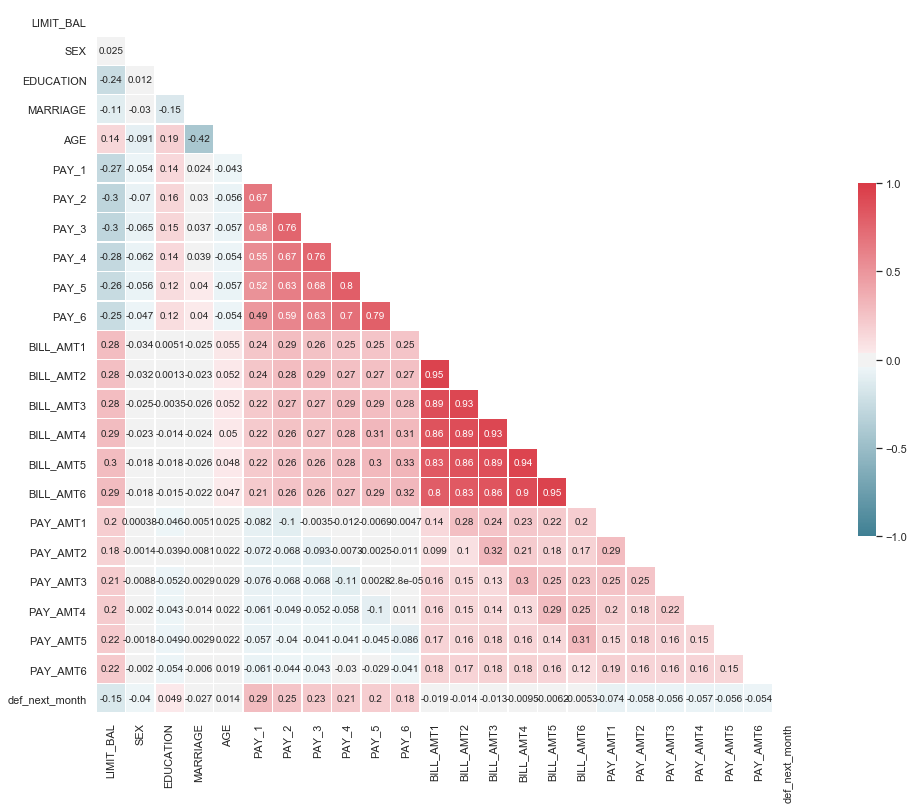

In [34]:
# Correlation matrix
sns.set(style="white", font_scale=1)
corr = df.corr() 
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 13))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax=sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cmap=cmap, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 10})
cbar=ax.collections[0].colorbar
cbar.set_ticks([-1, -0.50, 0, 0.50, 1])

Looking at the correlation matrix, we can not find high correlation between the target variable and the predictor. 

PAY_1 seems to be the highest correlated with the target variable (0.29).

However, there is high correlation among the BILL_AMT variables and among the PAY variables.

We conclude that there is low correlation between the predictor and response variables, but high correlation between the predictor variables themselves. This is the opposite of what we want.

These findings are important for several reasons:

1 - without any clear strong correlation between def_next_month and predictor variables, it might be difficult to predict customer default.

2 - correlation between predictor variables can cause issues with certain models (linear regression & multicollinearity).